In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
G = nx.Graph() # undirected graph

# GG = nx.DiGraph() # directed graph

In [3]:
city_set=[
    'London',
    'Paris',
    'Madrid',
    'Delhi',
    'Rome',
    'Tokyo',
    'Berlin',
    'Bern'
]

# add a nodes for each city
for city in city_set:
    G.add_node(city)

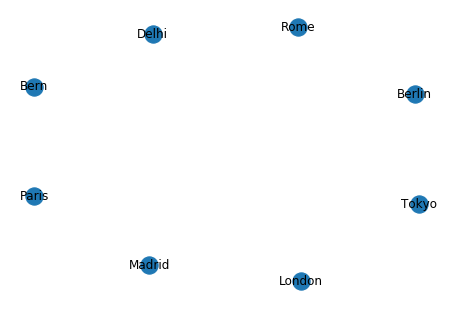

In [4]:
# let us look at Graph
# Should have one node per city (and NO CONNECTIONS)
nx.draw(G, with_labels =1)
plt.show()

let us add edges between these cities

weight will indicate = travelling cost

In [5]:
# for now let us add edges RANDOMLY

# generating list of random $$ costs
costs=np.arange(100, 2100, 100)
costs = list(costs)
print(costs)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]


In [6]:
list(G.nodes())

['London', 'Paris', 'Madrid', 'Delhi', 'Rome', 'Tokyo', 'Berlin', 'Bern']

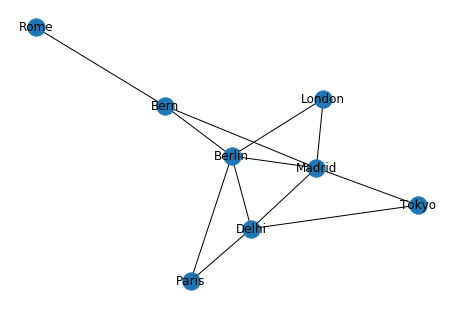

In [7]:
# Let us add 12 edges to this network
import random

while G.number_of_edges()<12:
    # random.choice chooses random entry in list
    city_1 = random.choice(list(G.nodes())) 
    city_2 = random.choice(list(G.nodes()))
    
    
    #1st don't want the random cities to be the same
    #2nd don't already want an edge between the cities!
    if city_1 != city_2 and G.has_edge(city_1, city_2) == 0:
        weight = random.choice(costs) #pick random cost
        
        # adding the edge
        G.add_edge(city_1, city_2, weight=weight)

nx.draw(G, with_labels=1)
plt.show()

In [8]:
# we can change the layout of the graph..

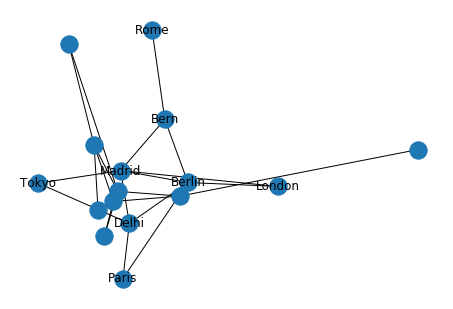

In [9]:
#for example the spectral layout
pos=nx.draw_spectral(G)
nx.draw(G,pos,with_labels=1)
plt.show()

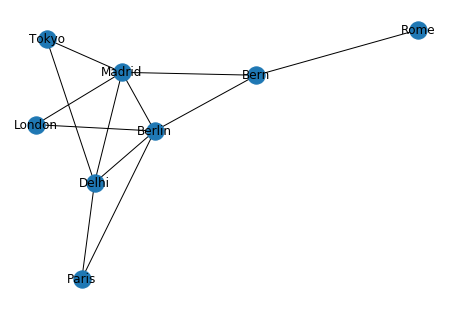

In [10]:
#for example the spring layout
pos=nx.spring_layout(G)
nx.draw(G,pos,with_labels=1)
plt.show()

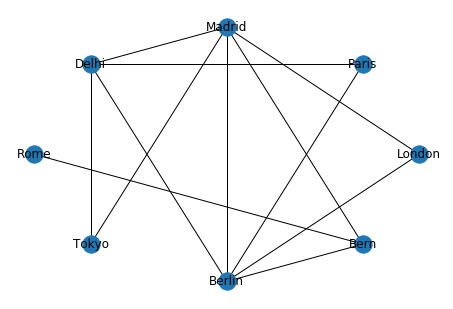

In [11]:
#for example the circular layout
pos=nx.circular_layout(G)
nx.draw(G,pos,with_labels=1)
plt.show()

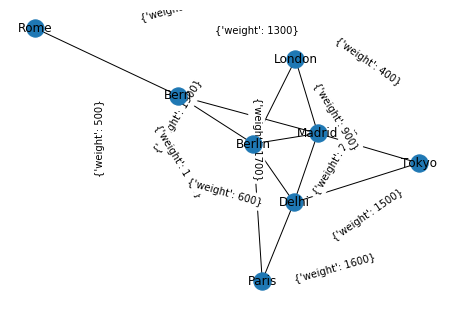

In [12]:
%matplotlib inline


pos=nx.circular_layout(G)
nx.draw(G, with_labels=1)
nx.draw_networkx_edge_labels(G, pos) #showing edge weights!
plt.show()

we have network with cities and roads

now interested with paths between cities and COST (of travel)!

In [13]:
# first look at paths between cities
# aka path lenght between cities

# first check if graph connected
# (aka may have points not connected...
# in which case impossible to travel between some cities)

print(nx.is_connected(G))
# True == path between every two pair of nodes!

True


In [20]:
# checking if it is possible to travel between cities!
for city1 in G.nodes():
    for city2 in G.nodes():
        print(city1, city2, nx.has_path(G, city1, city2))

London London True
London Paris True
London Madrid True
London Delhi True
London Rome True
London Tokyo True
London Berlin True
London Bern True
Paris London True
Paris Paris True
Paris Madrid True
Paris Delhi True
Paris Rome True
Paris Tokyo True
Paris Berlin True
Paris Bern True
Madrid London True
Madrid Paris True
Madrid Madrid True
Madrid Delhi True
Madrid Rome True
Madrid Tokyo True
Madrid Berlin True
Madrid Bern True
Delhi London True
Delhi Paris True
Delhi Madrid True
Delhi Delhi True
Delhi Rome True
Delhi Tokyo True
Delhi Berlin True
Delhi Bern True
Rome London True
Rome Paris True
Rome Madrid True
Rome Delhi True
Rome Rome True
Rome Tokyo True
Rome Berlin True
Rome Bern True
Tokyo London True
Tokyo Paris True
Tokyo Madrid True
Tokyo Delhi True
Tokyo Rome True
Tokyo Tokyo True
Tokyo Berlin True
Tokyo Bern True
Berlin London True
Berlin Paris True
Berlin Madrid True
Berlin Delhi True
Berlin Rome True
Berlin Tokyo True
Berlin Berlin True
Berlin Bern True
Bern London True
Bern Par

next what we want is SHORTEST PATHS!

networkX has functions:
https://networkx.github.io/documentation/stable/reference/algorithms/shortest_paths.html

In [23]:
#shortest_path(G[, source, target, weight, …])

# note need WEIGHTED graph functions!
print(nx.dijkstra_path_length(G,'Bern', 'Madrid'))
print(nx.dijkstra_path_length(G,'Rome', 'Tokyo'))

900
2800


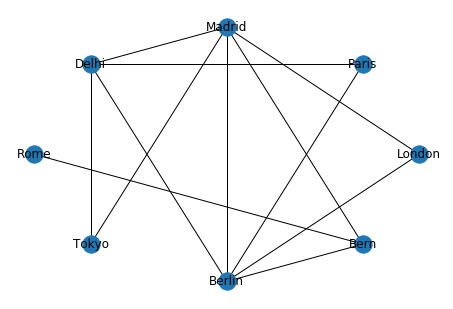

In [30]:
pos=nx.circular_layout(G)
nx.draw(G, pos, with_labels=1)#, node_color = ['r','b'])
